Starting simulation at t=0. s for a duration of 40. ms
40. ms (100%) simulated in < 1s
Starting simulation at t=90. ms for a duration of 10. ms
10. ms (100%) simulated in < 1s


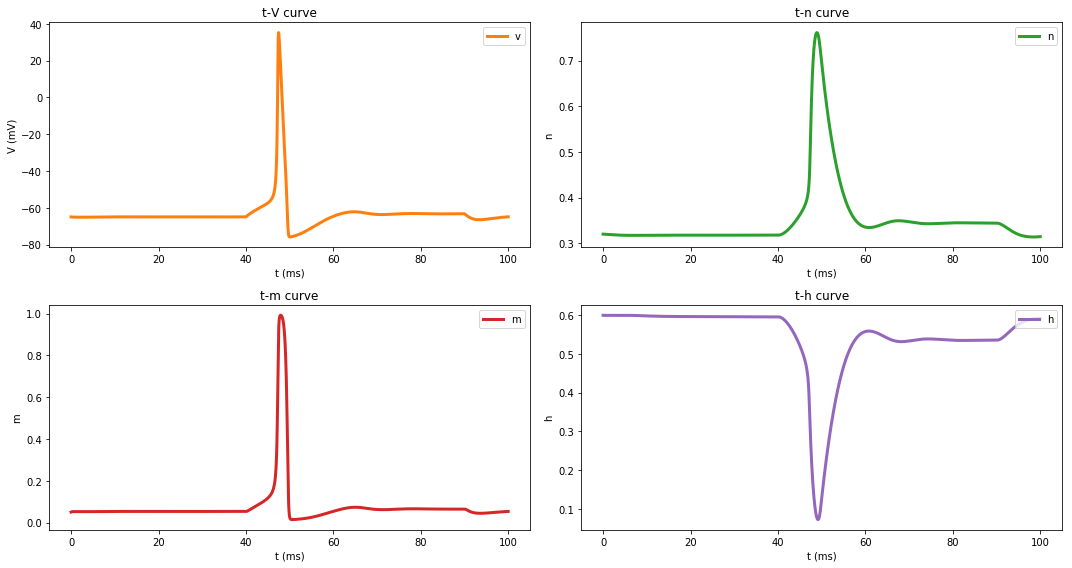

In [2]:
from brian2 import *

El = -54.4*mV
ENa = 50*mV
EK = -77*mV
gl = 0.3*msiemens/cm**2
gNa0 = 120*msiemens/cm**2
gK = 36*msiemens/cm**2

Cm=1*uF/cm**2

# Typical equations
eqs = '''
# The same equations for the whole neuron, but possibly different parameter values
# distributed transmembrane current
dv/dt = (gl*(El-v) - gNa*(m*m*m)*h*(v-ENa) - gK*(n*n*n*n)*(v-EK) + I)/Cm : volt
I : amp/meter**2  # applied current
dm/dt = alpham * (1-m) - betam * m : 1
dn/dt = alphan * (1-n) - betan * n : 1
dh/dt = alphah * (1-h) - betah * h : 1
alpham = (0.1/mV) * (v+40*mV) / (1-(exp((-v-40*mV) / (10*mV))))/ms : Hz
betam = 4 * exp((-v-(65*mV))/(18*mV))/ms : Hz
alphah = 0.07 * exp((-v-(65*mV))/(20*mV))/ms : Hz
betah = 1/(exp((-v-35*mV) / (10*mV)) + 1)/ms : Hz
alphan = (0.01/mV) * (v+55*mV) / (1-(exp((-v-55*mV) / (10*mV))))/ms : Hz
betan = 0.125*exp((-v-(65*mV))/(80*mV))/ms : Hz
gNa : siemens/meter**2
'''

 
neuron = NeuronGroup(20, eqs,
                    threshold='v > 80*mV', reset = 'v=-65*mV',
                    method='euler', dt = 0.025*ms)

neuron.v = -65*mV
neuron.h = 0.6
neuron.m = 0.05
neuron.n = 0.32
neuron.I = 0
neuron.gNa = gNa0
M = StateMonitor(neuron, variables=True, record=True)

run(40*ms, report='text')
neuron.I[0] = 0.023*amp/metre**2  # current injection at one end
run(50*ms)
neuron.I = 0*amp/metre**2

run(10*ms, report='text')
fig = figure(figsize=(15,8))

subplot(221)
plot(M.t/ms, M.v[0]/mV, c='C1', lw=3, label='v')
xlabel('t (ms)')
ylabel('V (mV)')
plt.legend(loc=1)
title('t-V curve')

subplot(222)
plot(M.t/ms, M.n[0], c='C2', lw=3, label='n')
xlabel('t (ms)')
ylabel('n')
plt.legend(loc=1)
title('t-n curve')

subplot(223)
plot(M.t/ms, M.m[0], c='C3', lw=3, label='m')
xlabel('t (ms)')
ylabel('m')
plt.legend(loc=1)
title('t-m curve')

subplot(224)
plot(M.t/ms, M.h[0], c='C4', lw=3, label='h')
xlabel('t (ms)')
ylabel('h')
plt.legend(loc=1)
title('t-h curve')

tight_layout()
show()